<a href="https://colab.research.google.com/github/ThanhQuynh0202/VoNgocThanhQuynh_20104053_BTVN/blob/main/Nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Nhận diện các loài hoa
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/BTVN/Hoa

/content/drive/My Drive/Colab Notebooks/BTVN/Hoa


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Hoa/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 227 images belonging to 3 classes.


In [6]:
validation=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Hoa/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 130 images belonging to 3 classes.


In [7]:
training_set.class_indices

{'Hoa hong': 0, 'Hoa huong duong': 1, 'Hoa mai': 2}

In [8]:
validation.class_indices

{'Hoa hong': 0, 'Hoa huong duong': 1, 'Hoa mai': 2}

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
8/8 [==============================] - 157s 21s/step - loss: 8.1183 - accuracy: 0.3436 - val_loss: 1.1730 - val_accuracy: 0.4000
Epoch 2/50
8/8 [==============================] - 7s 911ms/step - loss: 1.0954 - accuracy: 0.4141 - val_loss: 1.0221 - val_accuracy: 0.4154
Epoch 3/50
8/8 [==============================] - 7s 878ms/step - loss: 0.9346 - accuracy: 0.5419 - val_loss: 0.7178 - val_accuracy: 0.6385
Epoch 4/50
8/8 [==============================] - 7s 862ms/step - loss: 0.7798 - accuracy: 0.5551 - val_loss: 0.6432 - val_accuracy: 0.6769
Epoch 5/50
8/8 [==============================] - 7s 874ms/step - loss: 0.6597 - accuracy: 0.6520 - val_loss: 0.4836 - val_accuracy: 0.7692
Epoch 6/50
8/8 [==============================] - 7s 969ms/step - loss: 0.5320 - accuracy: 0.7577 - val_loss: 0.4757 - val_accuracy: 0.7462
Epoch 7/50
8/8 [==============================] - 8s 1s/step - loss: 0.4846 - accuracy: 0.7445 - val_loss: 0.4416 - val_accuracy: 0.8000
Epoch 8/50
8/8 [=======

In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.05347459390759468
Train Accuracy 0.9823788404464722


<function matplotlib.pyplot.show(*args, **kw)>

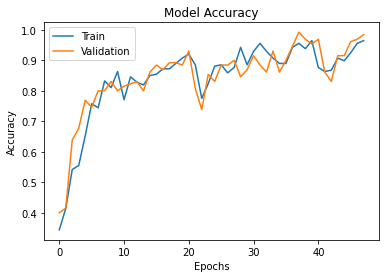

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
model.save("Hoa.h5")

In [14]:
model_CNN=load_model('Hoa.h5')

1/1 [==============================] - 0s 17ms/step
Hoa Mai


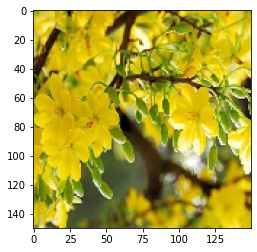

1/1 [==============================] - 0s 15ms/step
Hoa Mai


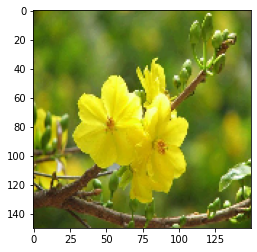

1/1 [==============================] - 0s 17ms/step
Hoa Huong Duong


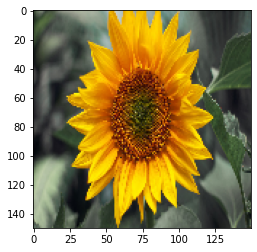

1/1 [==============================] - 0s 21ms/step
Hoa Huong Duong


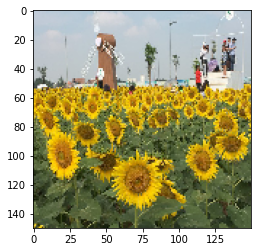

1/1 [==============================] - 0s 24ms/step
Hoa Hong


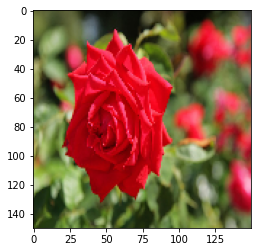

1/1 [==============================] - 0s 18ms/step
Hoa Hong


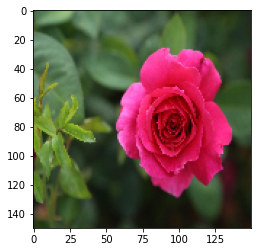

In [17]:
test="/content/drive/My Drive/Colab Notebooks/BTVN/Hoa/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Hoa Hong'
  if round(result[0][1])==1:
    prediction='Hoa Huong Duong'
  if round(result[0][2])==1:
    prediction='Hoa Mai'
  print(prediction)
  plt.show()